In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import csv

#df = pd.read_csv('data.csv')
#print(df.to_string()) 

# Data Extraction

In [2]:
file = open("./results_data/model 2/spacing0.9/data1.csv" , "r")
data = list(csv.reader(file,delimiter=","))
preds= []
pred_time =[]
targets = []
time= []
hit = []

#data extraction
for i in range(1,101):
    idx1=data[i].index("time")
    preds.append([eval(i) for i in data[i][1:idx1]])
    idx2=data[i].index("target")
    pred_time.append([float((i)[6:-1]) for i in data[i][idx1+1:idx2]])
    targets.append(int(data[i][-3]))
    time.append(float((data[i][-2])[6:-1]))
    hit.append(1 if data[i][-1]=='AI' else 0)

In [3]:
AI_pred = [preds[i] for i, x in enumerate(hit) if x == 1]
time_target = [time[i] for i, x in enumerate(hit) if x == 1]
AI_target = [targets[i] for i, x in enumerate(hit) if x == 1]
AI_time = [pred_time[i] for i, x in enumerate(hit) if x == 1]
time_faster = []
for i in range(len(AI_pred)):
    try:
        idx = len(AI_pred[i])-np.where(np.array(AI_pred[i][::-1]) != AI_target[i])[0][0]
    except IndexError:
        idx = 0
    #print(i)
    time_faster.append(time_target[i]-AI_time[i][idx]) 



0.5220100000000002


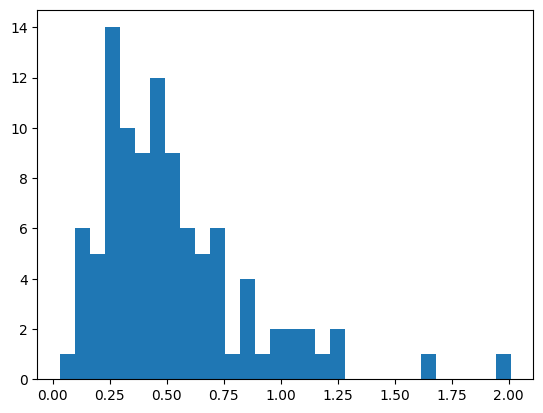

In [4]:
print(np.mean(time_faster))
y, x, _ = plt.hist(time_faster, bins = 30)



In [5]:
len(AI_pred)

100

In [336]:
time_target[44]-AI_time[44][15]

0.902000000000001

In [346]:
AI_pred[77]

[3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4]

In [348]:
idx = len(AI_pred[77])-np.where(np.array(AI_pred[77][::-1]) != AI_target[77])[0][0]
idx

18

In [355]:
time_target[77]-AI_time[77][0]

-57.762

-57.762